This Python Notebook generates features for "transactions_v2.csv" and exports a file into a folder called data "final_transactions". 
In this notebook, more changes to "transactions_v2" can be made. 
In the notebook "algorithm_solution" load "final_transactions" in.

In [1]:
#Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import seaborn as sns
import matplotlib.dates as mdates
import time
from datetime import datetime
from pandas.lib import Timestamp


#Configure Panda
pd.options.display.width = 200

/Users/pablodepaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  # This is added back by InteractiveShellApp.init_path()


## 1. Data import and Feature Engineering

In [2]:
#Load transactions
transactions = pd.read_csv("data/transactions_v2.csv")

In [3]:
#Look at the first values in transactions:
print("Transactions:")
transactions.head()

Transactions:


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [4]:
print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)

Number of rows & columns "TRANSACTIONS":  (1431009, 9)


### 1.2. Feature 1: Feature computed as the difference between the "plan price" and "amount paid" (discount)
I create a discount column to see how much discount was offered to the customer.

In [5]:
transactions['discount'] = transactions['plan_list_price'] - transactions['actual_amount_paid']

#transactions['discount'].unique() #Find the unique elements of an array/dataset

In [6]:
print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)

Number of rows & columns "TRANSACTIONS":  (1431009, 10)


In [7]:
transactions.discount.unique()

array([    0,   180,    30,  -149,   149,    50,  -119,    20,    99,
          45,    -1,  -129,  -596,   129,   120, -1788,  -100, -1200,
        -447,     1,  1599,    10,     8,   -90,    -3,  -894,   894])

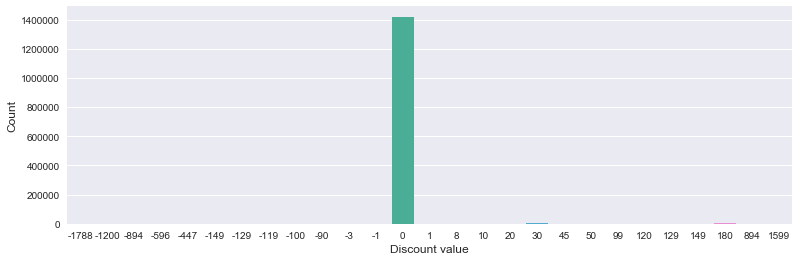

In [8]:
mpld3.enable_notebook()

sns.set(rc={'figure.figsize':(13,4)}) #Horizontal, vertical
sns.countplot(x='discount', data = transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Discount value', fontsize=12)
plt.show()

I CANNOT DELETE ROWS! SO, I WILL DO ONE-HOT ENCODING ANG GET RID OF THE COLUMNS I DON'T WANT (negative discount or too high). It doesn't make sense to have negative values in discount.

In [9]:
#transactions = transactions.loc[transactions['discount'].isin(['0','180','30','149','50','20','99','45','129','120','1','10','8'])]

#One-hot encode the discount. 

trans1 = transactions

#One-hot encode payment_method_id and save it into payment_method_id_encode
discount_enc = pd.get_dummies(trans1['discount'], prefix='discount')

#Drop variable payment_method_id in trans1, as it is no longer needed
trans1 = trans1.drop('discount', axis=1)

#Join the encoded payment_method_id_encode
trans1 = trans1.join(discount_enc)

trans1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_-1788,...,discount_30,discount_45,discount_50,discount_99,discount_120,discount_129,discount_149,discount_180,discount_894,discount_1599
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0,0,...,0,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0,0,...,0,0,0,0,0,0,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0,0,...,0,0,0,0,0,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1,0,...,0,0,0,0,0,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#I get rid of columns whose value is negative and positive values not significative (see graph above)
trans1 = trans1.drop("discount_-1788", axis=1)
trans1 = trans1.drop("discount_-1200", axis=1)
trans1 = trans1.drop("discount_-894", axis=1)
trans1 = trans1.drop("discount_-596", axis=1)
trans1 = trans1.drop("discount_-447", axis=1)
trans1 = trans1.drop("discount_-149", axis=1)
trans1 = trans1.drop("discount_-129", axis=1)
trans1 = trans1.drop("discount_-119", axis=1)
trans1 = trans1.drop("discount_-100", axis=1)
trans1 = trans1.drop("discount_-90", axis=1)
trans1 = trans1.drop("discount_-3", axis=1)
trans1 = trans1.drop("discount_-1", axis=1)

trans1 = trans1.drop("discount_1", axis=1)
trans1 = trans1.drop("discount_8", axis=1)
trans1 = trans1.drop("discount_10", axis=1)
trans1 = trans1.drop("discount_45", axis=1)
trans1 = trans1.drop("discount_99", axis=1)
trans1 = trans1.drop("discount_120", axis=1)
trans1 = trans1.drop("discount_129", axis=1)
trans1 = trans1.drop("discount_894", axis=1)
trans1 = trans1.drop("discount_1599", axis=1)

In [11]:
trans1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,discount_50,discount_149,discount_180
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0,1,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0,1,0,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0,1,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1,1,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0,1,0,0,0,0,0


### 1.3. Feature 2 : is_discount
Feature to check whether the customer has availed any discount or not

In [12]:
#transactions['is_discount'] = transactions.discount_0.apply(lambda x: 1 if x > 0 else 0)
#transactions['is_discount'] = transactions.discount_20.apply(lambda x: 1 if x > 0 else 0)
#transactions['is_discount'] = transactions.discount_30.apply(lambda x: 1 if x > 0 else 0)
#transactions['is_discount'] = transactions.discount_50.apply(lambda x: 1 if x > 0 else 0)
#transactions['is_discount'] = transactions.discount_149.apply(lambda x: 1 if x > 0 else 0)
#transactions['is_discount'] = transactions.discount_180.apply(lambda x: 1 if x > 0 else 0)


#print(transactions['is_discount'].count())

In [13]:
#print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)

### 1.4. Feature 3: membership duration
Difference between transaction_date and membership_expire_date. We find the difference in terms of days and months. We keep this result as integer.

In [14]:
#First of all, transform the dates to "datetpye"
trans1['transaction_date'] = trans1.transaction_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )
trans1['membership_expire_date'] = trans1.membership_expire_date.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )
trans1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,discount_50,discount_149,discount_180
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,0,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,0,0,0,0,0


In [15]:
#--- difference in days ---
trans1['mem_duration'] = trans1.membership_expire_date - trans1.transaction_date
trans1['mem_duration'] = trans1['mem_duration'] / np.timedelta64(1, 'D')
trans1['mem_duration'] = trans1['mem_duration'].astype(int)

In [16]:
trans1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,discount_50,discount_149,discount_180,mem_duration
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,0,0,0,0,0,93
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,0,0,0,0,0,1342
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,0,0,0,0,0,50
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,0,0,0,0,0,2
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,0,0,0,0,0,31


In [17]:
print(trans1.mem_duration.unique())
print(trans1.columns)

[  93 1342   50 ... 2341 2707 2158]
Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'transaction_date', 'membership_expire_date', 'is_cancel', 'discount_0',
       'discount_20', 'discount_30', 'discount_50', 'discount_149', 'discount_180', 'mem_duration'],
      dtype='object')


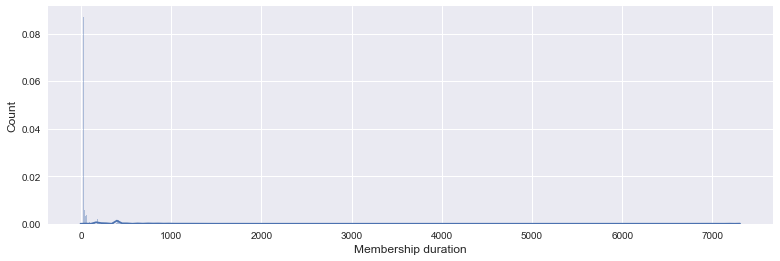

In [18]:
sns.set(rc={'figure.figsize':(13,4)}) #Horizontal, vertical
sns.distplot( trans1["mem_duration"], bins = 1000 )
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Membership duration', fontsize = 12)
plt.show()

I can see that 30 is the most general membership duration. So I will put as 30 the values above 100.
I will one-hot encode this and get rid of the columns less important.

In [19]:
# Change the mem_duration of all rows with an value greater than 60 to 40
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
trans1.loc[trans1['mem_duration'] > 60, "mem_duration"] = 30
trans1.loc[trans1['mem_duration'] < 0, "mem_duration"] = 0

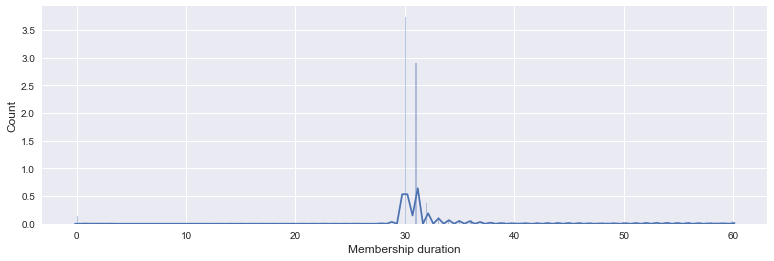

In [20]:
sns.set(rc={'figure.figsize':(13,4)}) #Horizontal, vertical
sns.distplot( trans1["mem_duration"], bins = 500 )
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Membership duration', fontsize = 12)
plt.show()

In [21]:
trans1.mem_duration.unique()

array([30, 50,  2, 31, 39, 46, 33, 32, 36, 42, 41, 38, 45, 35, 57, 51, 55,
       54, 60, 34, 52,  0, 43, 59, 58, 53, 49, 56,  1, 37, 40, 48,  3, 47,
        8, 44, 15,  4, 23, 18,  6, 19, 25, 29, 17, 11,  5,  9, 24, 22, 14,
       28, 10,  7, 20, 13, 12, 16, 21, 26, 27])

In [22]:
trans1.head()
#I am going to delete the rows whose mem_duration is bigger than 90 days (for example)
#UNDONE

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,discount_50,discount_149,discount_180,mem_duration
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,0,0,0,0,0,30
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,0,0,0,0,0,30
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,0,0,0,0,0,50
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,0,0,0,0,0,2
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,0,0,0,0,0,31


### 1.5. Feature Engineering: "trans1". Hot-encode "payment_method_id" feature and test algorithm

In [23]:
#One-hot encode the payment_method_id. 
#Instead of having a variable called payment_method_id with values from 2-41, the alorithm performs better with 0's and 1's -> onehot encoding

trans1a = trans1

#One-hot encode payment_method_id and save it into payment_method_id_encode
payment_method_id_encode = pd.get_dummies(trans1a['payment_method_id'], prefix='payment_method_id')

#Drop variable payment_method_id in trans1, as it is no longer needed
#trans1a = trans1a.drop('payment_method_id', axis=1)

#Join the encoded payment_method_id_encode
trans1a = trans1a.join(payment_method_id_encode)

trans1a.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,...,1,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,...,0,0,0,0,0,0,0,0,0,1
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,...,0,0,0,0,1,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,...,0,0,0,0,1,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#I get rid of columns whose value is below 30 as not significative
trans1a = trans1a.drop("payment_method_id_2", axis=1)
trans1a = trans1a.drop("payment_method_id_3", axis=1)
trans1a = trans1a.drop("payment_method_id_5", axis=1)
trans1a = trans1a.drop("payment_method_id_6", axis=1)
trans1a = trans1a.drop("payment_method_id_8", axis=1)
trans1a = trans1a.drop("payment_method_id_10", axis=1)
trans1a = trans1a.drop("payment_method_id_11", axis=1)
trans1a = trans1a.drop("payment_method_id_12", axis=1)
trans1a = trans1a.drop("payment_method_id_13", axis=1)
trans1a = trans1a.drop("payment_method_id_14", axis=1)
trans1a = trans1a.drop("payment_method_id_15", axis=1)
trans1a = trans1a.drop("payment_method_id_16", axis=1)
trans1a = trans1a.drop("payment_method_id_17", axis=1)
trans1a = trans1a.drop("payment_method_id_18", axis=1)
trans1a = trans1a.drop("payment_method_id_19", axis=1)
trans1a = trans1a.drop("payment_method_id_20", axis=1)
trans1a = trans1a.drop("payment_method_id_21", axis=1)
trans1a = trans1a.drop("payment_method_id_22", axis=1)
trans1a = trans1a.drop("payment_method_id_23", axis=1)
trans1a = trans1a.drop("payment_method_id_24", axis=1)
trans1a = trans1a.drop("payment_method_id_25", axis=1)
trans1a = trans1a.drop("payment_method_id_26", axis=1)
trans1a = trans1a.drop("payment_method_id_27", axis=1)
trans1a = trans1a.drop("payment_method_id_28", axis=1)
trans1a = trans1a.drop("payment_method_id_29", axis=1)

In [25]:
trans1a.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,...,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,...,1,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,...,0,0,0,0,0,0,0,0,0,1
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,...,0,0,0,0,1,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,...,0,0,0,0,1,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)
print('Number of rows & columns "TRANSACTIONS": ', trans1a.shape)
#Same number of rows!

Number of rows & columns "TRANSACTIONS":  (1431009, 10)
Number of rows & columns "TRANSACTIONS":  (1431009, 28)


### 1.5.a. Feature Engineering: pay_method_churn create 3 variables for payment method 32, 35, 38 (which are the ones that have most probability to _churn_)

In [27]:
mask = (trans1a.payment_method_id == 32)
mask1 = (trans1a.payment_method_id == 35)
mask2 = (trans1a.payment_method_id == 38)

trans1a['pay_method_churn'] = trans1a.payment_method_id
trans1a.pay_method_churn = 0
column_name = 'pay_method_churn'
trans1a.loc[mask,column_name]=1
trans1a.loc[mask1,column_name]=1
trans1a.loc[mask2,column_name]=1

trans1a.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,...,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,pay_method_churn
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,...,0,0,0,0,0,0,0,0,0,1
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,1,...,0,0,0,0,0,0,0,0,1,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,1,...,0,0,0,1,0,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,1,...,0,0,0,1,0,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,1,...,0,0,0,0,0,0,0,0,1,0


### 1.6. Feature Engineering: "trans2". Hot-encode "payment_plan_days" feature and test algorithm

In [28]:
trans2 = trans1a

payment_plan_days_encode = pd.get_dummies(trans2['payment_plan_days'], prefix='payment_plan_days')

#Drop variable payment_method_id in trans1, as it is no longer needed
trans2 = trans2.drop('payment_plan_days', axis=1)

#Join the encoded payment_method_id_encode
trans2 = trans2.join(payment_plan_days_encode)

trans2.head()

,msno,payment_method_id,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,...,payment_plan_days_230,payment_plan_days_240,payment_plan_days_270,payment_plan_days_360,payment_plan_days_365,payment_plan_days_395,payment_plan_days_400,payment_plan_days_410,payment_plan_days_415,payment_plan_days_450
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,298,298,0,2017-01-31,2017-05-04,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,149,149,1,2015-08-09,2019-04-12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,180,180,1,2017-03-03,2017-04-22,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,180,180,1,2017-03-29,2017-03-31,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,99,99,1,2017-03-23,2017-04-23,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#I get rid of columns whose value is below 30 as not significative
trans2 = trans2.drop("payment_plan_days_0", axis=1)
trans2 = trans2.drop("payment_plan_days_1", axis=1)
trans2 = trans2.drop("payment_plan_days_3", axis=1)
trans2 = trans2.drop("payment_plan_days_7", axis=1)
trans2 = trans2.drop("payment_plan_days_10", axis=1)
trans2 = trans2.drop("payment_plan_days_14", axis=1)
trans2 = trans2.drop("payment_plan_days_21", axis=1)
trans2 = trans2.drop("payment_plan_days_31", axis=1)
trans2 = trans2.drop("payment_plan_days_35", axis=1)
trans2 = trans2.drop("payment_plan_days_45", axis=1)
trans2 = trans2.drop("payment_plan_days_60", axis=1)
trans2 = trans2.drop("payment_plan_days_70", axis=1)
trans2 = trans2.drop("payment_plan_days_80", axis=1)
trans2 = trans2.drop("payment_plan_days_100", axis=1)
trans2 = trans2.drop("payment_plan_days_110", axis=1)
trans2 = trans2.drop("payment_plan_days_120", axis=1)
trans2 = trans2.drop("payment_plan_days_200", axis=1)
trans2 = trans2.drop("payment_plan_days_230", axis=1)
trans2 = trans2.drop("payment_plan_days_240", axis=1)
trans2 = trans2.drop("payment_plan_days_270", axis=1)
trans2 = trans2.drop("payment_plan_days_360", axis=1)
trans2 = trans2.drop("payment_plan_days_365", axis=1)
trans2 = trans2.drop("payment_plan_days_395", axis=1)
trans2 = trans2.drop("payment_plan_days_400", axis=1)
trans2 = trans2.drop("payment_plan_days_415", axis=1)
trans2 = trans2.drop("payment_plan_days_450", axis=1)
print('Done!')

Done!


In [30]:
trans2.head()

,msno,payment_method_id,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,...,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,pay_method_churn,payment_plan_days_30,payment_plan_days_90,payment_plan_days_180,payment_plan_days_195,payment_plan_days_410
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,298,298,0,2017-01-31,2017-05-04,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,149,149,1,2015-08-09,2019-04-12,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,180,180,1,2017-03-03,2017-04-22,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,180,180,1,2017-03-29,2017-03-31,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,99,99,1,2017-03-23,2017-04-23,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [31]:
print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)
print('Number of rows & columns "TRANSACTIONS": ', trans2.shape)
#Same number of rows!

Number of rows & columns "TRANSACTIONS":  (1431009, 10)
Number of rows & columns "TRANSACTIONS":  (1431009, 33)


### 1.7. Feature Engineering: "trans3". Hot-encode "plan_list_price" feature and test algorithm

In [32]:
trans2.plan_list_price.unique()

array([ 298,  149,  180,   99, 1788,  536,  129,  100,  894,  480,  300,
        477, 1299, 1599,  699, 1200,    0,  799,  930,  600,    1,   35,
       1399,  150,  119,  447,  450,  210, 1000,  134,  120, 2000,  400,
        131,  500,  350, 1260,  126,  596,   70,  265, 1150,  143,  105,
       1300,   50,   30,   15])

In [33]:
trans3 = trans2

plan_list_price_encode = pd.get_dummies(trans3['plan_list_price'], prefix='plan_list_price')

#Drop variable payment_method_id in trans1, as it is no longer needed
trans3 = trans3.drop('plan_list_price', axis=1)

#Join the encoded payment_method_id_encode
trans3 = trans3.join(plan_list_price_encode)

trans3.head()

,msno,payment_method_id,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,...,plan_list_price_1000,plan_list_price_1150,plan_list_price_1200,plan_list_price_1260,plan_list_price_1299,plan_list_price_1300,plan_list_price_1399,plan_list_price_1599,plan_list_price_1788,plan_list_price_2000
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,298,0,2017-01-31,2017-05-04,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,149,1,2015-08-09,2019-04-12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,180,1,2017-03-03,2017-04-22,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,180,1,2017-03-29,2017-03-31,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,99,1,2017-03-23,2017-04-23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#I get rid of columns
trans3 = trans3.drop("plan_list_price_0", axis=1)
trans3 = trans3.drop("plan_list_price_1", axis=1)
trans3 = trans3.drop("plan_list_price_15", axis=1)
trans3 = trans3.drop("plan_list_price_30", axis=1)
trans3 = trans3.drop("plan_list_price_35", axis=1)
trans3 = trans3.drop("plan_list_price_50", axis=1)
trans3 = trans3.drop("plan_list_price_70", axis=1)
trans3 = trans3.drop("plan_list_price_100", axis=1)
trans3 = trans3.drop("plan_list_price_105", axis=1)
trans3 = trans3.drop("plan_list_price_119", axis=1)
trans3 = trans3.drop("plan_list_price_120", axis=1)
trans3 = trans3.drop("plan_list_price_126", axis=1)
trans3 = trans3.drop("plan_list_price_131", axis=1)
trans3 = trans3.drop("plan_list_price_134", axis=1)
trans3 = trans3.drop("plan_list_price_143", axis=1)
trans3 = trans3.drop("plan_list_price_150", axis=1)
trans3 = trans3.drop("plan_list_price_210", axis=1)
trans3 = trans3.drop("plan_list_price_265", axis=1)
trans3 = trans3.drop("plan_list_price_298", axis=1)
trans3 = trans3.drop("plan_list_price_300", axis=1)
trans3 = trans3.drop("plan_list_price_350", axis=1)
trans3 = trans3.drop("plan_list_price_400", axis=1)
trans3 = trans3.drop("plan_list_price_447", axis=1)
trans3 = trans3.drop("plan_list_price_450", axis=1)
trans3 = trans3.drop("plan_list_price_477", axis=1)
trans3 = trans3.drop("plan_list_price_480", axis=1)
trans3 = trans3.drop("plan_list_price_500", axis=1)
trans3 = trans3.drop("plan_list_price_536", axis=1)
trans3 = trans3.drop("plan_list_price_596", axis=1)
trans3 = trans3.drop("plan_list_price_600", axis=1)
trans3 = trans3.drop("plan_list_price_699", axis=1)
trans3 = trans3.drop("plan_list_price_799", axis=1)
trans3 = trans3.drop("plan_list_price_894", axis=1)
trans3 = trans3.drop("plan_list_price_930", axis=1)
trans3 = trans3.drop("plan_list_price_1000", axis=1)
trans3 = trans3.drop("plan_list_price_1150", axis=1)
trans3 = trans3.drop("plan_list_price_1200", axis=1)
trans3 = trans3.drop("plan_list_price_1260", axis=1)
trans3 = trans3.drop("plan_list_price_1299", axis=1)
trans3 = trans3.drop("plan_list_price_1300", axis=1)
trans3 = trans3.drop("plan_list_price_1399", axis=1)
trans3 = trans3.drop("plan_list_price_1599", axis=1)
#trans3 = trans3.drop("plan_list_price_1788", axis=1) I won't drop it by now as it is quite remarkable!
trans3 = trans3.drop("plan_list_price_2000", axis=1)
print('Done!')

Done!


In [35]:
print('Number of rows & columns "TRANSACTIONS": ', transactions.shape)
print('Number of rows & columns "TRANSACTIONS": ', trans3.shape)
#Same number of rows!

Number of rows & columns "TRANSACTIONS":  (1431009, 10)
Number of rows & columns "TRANSACTIONS":  (1431009, 37)


### 1.8. Feature 4. autorenew_&_not_cancel
A binary feature to see whether mebers have auto renewed and not cancelled at the same time:
- auto_renew = 1 and
- is_cancel = 0

In [36]:
trans3['autorenew_and_not_cancel'] = ((trans3.is_auto_renew == 1) == (trans3.is_cancel == 0)).astype(np.int8)

In [37]:
#trans3.head()

### 1.9. Feature 5: notAutorenew_&_cancel
Binary feature to predict possible churning if
- auto_renew = 0 and
- is_cancel = 1

In [38]:
trans3['notAutorenew_and_cancel'] = ((trans3.is_auto_renew == 0) == (trans3.is_cancel == 1)).astype(np.int8)

In [39]:
trans3.head()

,msno,payment_method_id,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount_0,discount_20,discount_30,...,payment_plan_days_180,payment_plan_days_195,payment_plan_days_410,plan_list_price_99,plan_list_price_129,plan_list_price_149,plan_list_price_180,plan_list_price_1788,autorenew_and_not_cancel,notAutorenew_and_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,298,0,2017-01-31,2017-05-04,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,149,1,2015-08-09,2019-04-12,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,180,1,2017-03-03,2017-04-22,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,180,1,2017-03-29,2017-03-31,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,99,1,2017-03-23,2017-04-23,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


### 1.10. Feature 6: trans_prev_no_cancel
Flag if more than 1 transaction in prior month AND no cancellation
- number transactions per user previous month > 1, AND
- is_cancel = 0

In [40]:
#Check if number of transaction per user (msno) previous month > 1 (1 row = 1 transaction)
#(trans3['msno'].value_counts().reset_index())['msno'].value_counts()

#trans3['trans_more_one'] = 0 #All zeros!
#Here, I get the msno's that have more than one transaction
#tmp1 = trans3['msno'].value_counts() 
#users_more_1_trans = tmp1[tmp1 > 1]
#I get the users with more than one transaction

#Now I want to put flag one to these msno
#for x in range(0, len(users_more_1_trans)):
 #   value = users_more_1_trans.index[x]
    #To select rows whose column value equals a scalar, some_value, use ==:
  #  if (trans3.msno == value):
   #     trans3.loc["value","trans_more_one"] = 1 #Row, column

#Store the result in a new column (drop it later lah)??

In [41]:
#trans3['trans_prev_no_cancel'] = (condition1 == (trans3.is_cancel == 0)).astype(np.int8)

In [42]:
#trans3.head()

### 1.10. Check dataset

In [43]:
#Check columns
print(len(trans3.columns))
trans3.columns

39


Index(['msno', 'payment_method_id', 'actual_amount_paid', 'is_auto_renew', 'transaction_date', 'membership_expire_date', 'is_cancel', 'discount_0', 'discount_20', 'discount_30', 'discount_50',
       'discount_149', 'discount_180', 'mem_duration', 'payment_method_id_30', 'payment_method_id_31', 'payment_method_id_32', 'payment_method_id_33', 'payment_method_id_34', 'payment_method_id_35',
       'payment_method_id_36', 'payment_method_id_37', 'payment_method_id_38', 'payment_method_id_39', 'payment_method_id_40', 'payment_method_id_41', 'pay_method_churn', 'payment_plan_days_30',
       'payment_plan_days_90', 'payment_plan_days_180', 'payment_plan_days_195', 'payment_plan_days_410', 'plan_list_price_99', 'plan_list_price_129', 'plan_list_price_149', 'plan_list_price_180',
       'plan_list_price_1788', 'autorenew_and_not_cancel', 'notAutorenew_and_cancel'],
      dtype='object')

#### 1.7.1. Check if missing values

In [44]:
trans3.isnull().sum()
#We should get 0!

msno                        0
payment_method_id           0
actual_amount_paid          0
is_auto_renew               0
transaction_date            0
membership_expire_date      0
is_cancel                   0
discount_0                  0
discount_20                 0
discount_30                 0
discount_50                 0
discount_149                0
discount_180                0
mem_duration                0
payment_method_id_30        0
payment_method_id_31        0
payment_method_id_32        0
payment_method_id_33        0
payment_method_id_34        0
payment_method_id_35        0
payment_method_id_36        0
payment_method_id_37        0
payment_method_id_38        0
payment_method_id_39        0
payment_method_id_40        0
payment_method_id_41        0
pay_method_churn            0
payment_plan_days_30        0
payment_plan_days_90        0
payment_plan_days_180       0
payment_plan_days_195       0
payment_plan_days_410       0
plan_list_price_99          0
plan_list_

## 2. Export file
Recall, it can take some minutes!

In [45]:
trans3.to_csv('data/final_transactions.csv', index=False)
print('Done!')

Done!
